# MadMiner physics tutorial (part 4B)

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [1]:
import logging

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d

In [2]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information from a SALLY model

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [3]:
# fisher = FisherInformation("data/lhe_data_shuffled.h5")
fisher = FisherInformation('data/delphes_please.h5')

14:41 madminer.analysis.da INFO    Loading data from data/delphes_please.h5
14:41 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
14:41 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
14:41 madminer.utils.inter INFO    HDF5 file does not contain systematic information
14:41 madminer.analysis.da INFO    Found 2 parameters
14:41 madminer.analysis.da INFO      0: cHq3Re33 (LHA: SMEFT 132, Power: 2, Range: (-1.0, 1.0))
14:41 madminer.analysis.da INFO      1: cHuRe33 (LHA: SMEFT 144, Power: 2, Range: (-1.0, 1.0))
14:41 madminer.analysis.da INFO    Did not find nuisance parameters
14:41 madminer.analysis.da INFO    Found 6 benchmarks
14:41 madminer.analysis.da INFO    Found 8 observables
14:41 madminer.analysis.da INFO    Found 10000 events
14:41 madminer.analysis.da INFO      10000 signal events sampled from benchmark sm
14:41 madminer.analysis.da INFO      0 signal events sampled from benchmark morphing_basis_vec

This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [171]:
info_sally2

array([[110.76865089,  29.10800401],
       [ 29.10800401, 128.41778037]])

14:20 madminer.analysis.da INFO    Loading data from data/delphes_0511xiao.h5
14:20 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
14:20 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
14:20 madminer.utils.inter INFO    HDF5 file does not contain systematic information
14:20 madminer.analysis.da INFO    Found 2 parameters
14:20 madminer.analysis.da INFO      0: cHq3Re33 (LHA: SMEFT 132, Power: 2, Range: (-1.0, 1.0))
14:20 madminer.analysis.da INFO      1: cHuRe33 (LHA: SMEFT 144, Power: 2, Range: (-1.0, 1.0))
14:20 madminer.analysis.da INFO    Did not find nuisance parameters
14:20 madminer.analysis.da INFO    Found 6 benchmarks
14:20 madminer.analysis.da INFO    Found 31 observables
14:20 madminer.analysis.da INFO    Found 60000 events
14:20 madminer.analysis.da INFO      60000 signal events sampled from benchmark sm
14:20 madminer.analysis.da INFO      0 signal events sampled from benchmark morphing_basis_

[[ 15.73343087 -13.35158293]
 [-13.35158293  11.57742304]] [[ 60.67738534 -53.9903094 ]
 [-53.9903094   60.51786942]]


/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:188: UserWarning: The following kwargs were not used by contour: 'label'
  cs = ax.contour(
/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:208: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlim(xrange)
/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:209: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label t

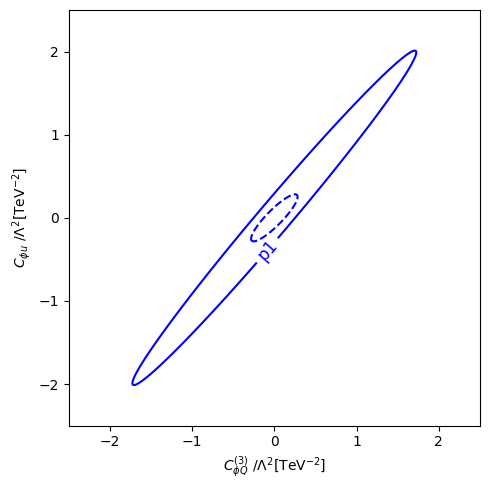

In [42]:
fisher1 = FisherInformation('data/delphes_0511xiao.h5')
info_sally1, _1 = fisher1.full_information(
    theta=[0, 0],
    model_file="models/sally_0511xiao",
    luminosity=1000.0 * 1000.0,
)
truth1, _11 = fisher1.truth_information(
    theta=[0, 0],
    luminosity=1000.0 * 1000.0,
)
print(info_sally1,truth1)
_ = plot_fisher_information_contours_2d(
    [info_sally1,truth1,],
    xlabel=r"$C_{\phi Q}^{(3)} \ / \Lambda^2\mathrm{[TeV^{-2}]}$",
    ylabel=r"$C_{\phi u} \ / \Lambda^2 \mathrm{[TeV^{-2}]}$",
    xrange=(-2.5, 2.5),
    yrange=(-2.5, 2.5),
    inline_labels=["p1", "true1"],
    colors = ['blue', 'blue']
)

14:19 madminer.analysis.da INFO    Loading data from data/delphes_0511_2xiao.h5
14:19 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
14:19 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
14:19 madminer.utils.inter INFO    HDF5 file does not contain systematic information
14:19 madminer.analysis.da INFO    Found 2 parameters
14:19 madminer.analysis.da INFO      0: cHq3Re33 (LHA: SMEFT 132, Power: 2, Range: (-1.0, 1.0))
14:19 madminer.analysis.da INFO      1: cHuRe33 (LHA: SMEFT 144, Power: 2, Range: (-1.0, 1.0))
14:19 madminer.analysis.da INFO    Did not find nuisance parameters
14:19 madminer.analysis.da INFO    Found 6 benchmarks
14:19 madminer.analysis.da INFO    Found 31 observables
14:19 madminer.analysis.da INFO    Found 60000 events
14:19 madminer.analysis.da INFO      60000 signal events sampled from benchmark sm
14:19 madminer.analysis.da INFO      0 signal events sampled from benchmark morphing_basi

[[ 94.2894391  -80.84749179]
 [-80.84749179  70.30370095]] [[ 364.80975444 -323.87775286]
 [-323.87775286  362.16904771]]


/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:188: UserWarning: The following kwargs were not used by contour: 'label'
  cs = ax.contour(
/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:208: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlim(xrange)
/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:209: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label t

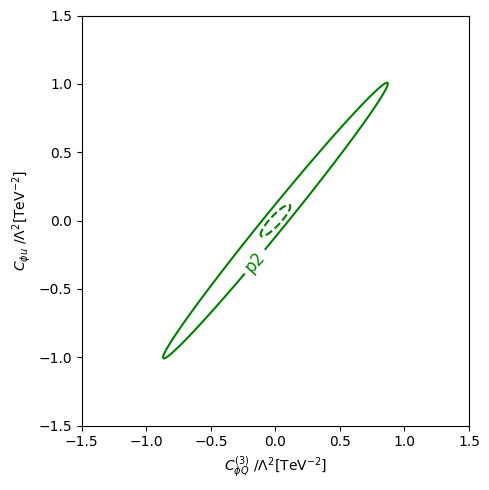

In [40]:
fisher2 = FisherInformation('data/delphes_0511_2xiao.h5')
info_sally2, _2 = fisher2.full_information(
    theta=[0, 0],
    model_file="models/sally_0511_2xiao",
    luminosity=1000.0 * 1000.0,
)
truth2, _22= fisher2.truth_information(
    theta=[0, 0],
    luminosity=1000.0 * 1000.0,
)

print(info_sally2,truth2)
_ = plot_fisher_information_contours_2d(
    [info_sally2,truth2,],
    xlabel=r"$C_{\phi Q}^{(3)} \ / \Lambda^2\mathrm{[TeV^{-2}]}$",
    ylabel=r"$C_{\phi u} \ / \Lambda^2 \mathrm{[TeV^{-2}]}$",
    xrange=(-1.5, 1.5),
    yrange=(-1.5, 1.5),
    inline_labels=["p2", "true2"],
    colors = ['green', 'green']
)

14:19 madminer.analysis.da INFO    Loading data from data/delphes_0511_3xiao.h5
14:19 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
14:19 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
14:19 madminer.utils.inter INFO    HDF5 file does not contain systematic information
14:19 madminer.analysis.da INFO    Found 2 parameters
14:19 madminer.analysis.da INFO      0: cHq3Re33 (LHA: SMEFT 132, Power: 2, Range: (-1.0, 1.0))
14:19 madminer.analysis.da INFO      1: cHuRe33 (LHA: SMEFT 144, Power: 2, Range: (-1.0, 1.0))
14:19 madminer.analysis.da INFO    Did not find nuisance parameters
14:19 madminer.analysis.da INFO    Found 6 benchmarks
14:19 madminer.analysis.da INFO    Found 31 observables
14:19 madminer.analysis.da INFO    Found 60000 events
14:19 madminer.analysis.da INFO      60000 signal events sampled from benchmark sm
14:19 madminer.analysis.da INFO      0 signal events sampled from benchmark morphing_basi

[[ 133.17136117 -113.64518799]
 [-113.64518799   97.71308417]] [[ 545.71700667 -486.21101465]
 [-486.21101465  545.73232879]]


/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:188: UserWarning: The following kwargs were not used by contour: 'label'
  cs = ax.contour(
/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:208: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xlim(xrange)
/usr/local/lib/python3.8/dist-packages/madminer/plotting/fisherinformation.py:209: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label t

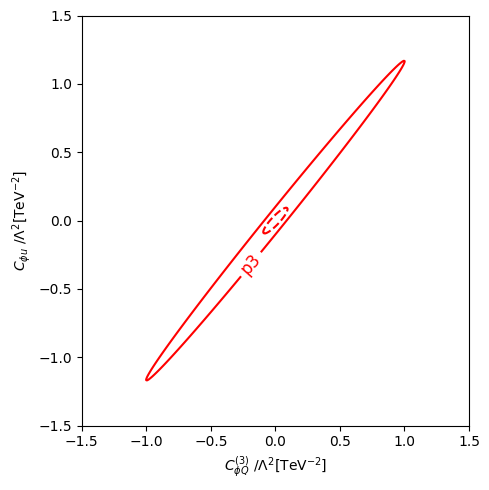

In [38]:
fisher3 = FisherInformation('data/delphes_0511_3xiao.h5')
info_sally3, _3 = fisher3.full_information(
    theta=[0, 0],
    model_file="models/sally_0511_3xiao",
    luminosity=1000.0 * 1000.0,
)
truth3, _33= fisher3.truth_information(
    theta=[0, 0],
    luminosity=1000.0 * 1000.0,
)

print(info_sally3,truth3)
_ = plot_fisher_information_contours_2d(
    [info_sally3,truth3,],
    xlabel=r"$C_{\phi Q}^{(3)} \ / \Lambda^2\mathrm{[TeV^{-2}]}$",
    ylabel=r"$C_{\phi u} \ / \Lambda^2 \mathrm{[TeV^{-2}]}$",
    xrange=(-1.5, 1.5),
    yrange=(-1.5, 1.5),
    inline_labels=["p3", "true3"],
    colors = ['red', 'red']
)

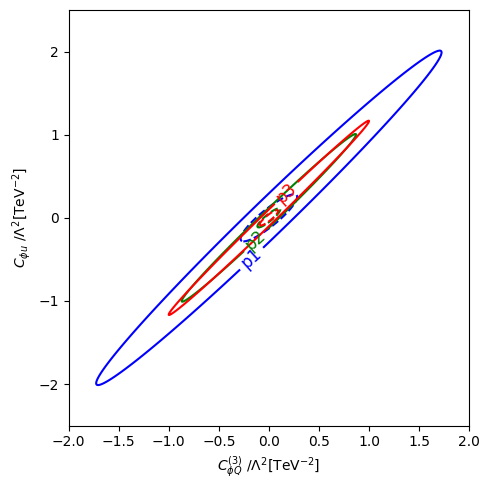

In [36]:
_ = plot_fisher_information_contours_2d(
    [info_sally1,truth1,info_sally2,truth2,info_sally3,truth3,],
    xlabel=r"$C_{\phi Q}^{(3)} \ / \Lambda^2\mathrm{[TeV^{-2}]}$",
    ylabel=r"$C_{\phi u} \ / \Lambda^2 \mathrm{[TeV^{-2}]}$",
    xrange=(-2, 2),
    yrange=(-2.5, 2.5),
    inline_labels=["p1", "true1","p2", "true2","p3", "true3",],
    linestyles = ["solid", "dashed", "solid", "dashed","solid", "dashed"],
    colors = ['blue', 'blue', 'green', 'green', 'red', 'red']
    
)

In [43]:
_.savefig("x1.pdf", format="pdf")

For comparison, we can calculate the Fisher information in the histogram of observables:

## 2. Calculating the Fisher information from a SALLY model

We can also calculate the Fisher Information using an ALICES model

## 3. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

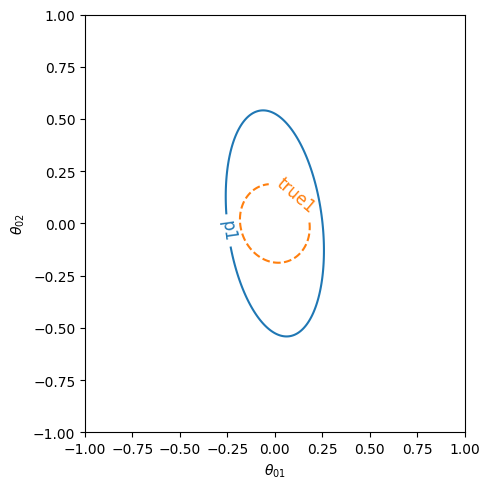

In [ ]:
xmin, xmax = -8., 32.
skip = 2

fig = plt.figure(figsize=(4.5,calculate_height(1,4.5)))
ax = plt.gca()
    
plt.plot([-100.,100.],[-100.,100.], ls='--', lw=1.5, c=colors[truth_index])

for s in range(n_strategies):
    if s == truth_index:
        continue
        
    plt.scatter(expected_llr[truth_index][::skip], expected_llr[s][::skip],
                marker='o', 
                s=8., lw=0.,
                label=labels[s])

plt.legend(loc='upper left', edgecolor='white', facecolor='white', framealpha=1.)

plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.xlabel(r"True $E[\log \, r(x | \theta,\,\theta_1)|\theta_{SM}]$")
plt.ylabel(r"Learned $E[\log \, \hat{r}(x | \theta,\,\theta_1)|\theta_{SM}]$")

adjust_margins(1,4.5)
plt.savefig("../figures/expected_likelihood_scatter_small.pdf")
